In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import time

In [3]:
# Directories for training, validation, and testing
train_dir = "/kaggle/input/iris-data/Retinal fundus images for DR/1.train"
val_dir = "/kaggle/input/iris-data/Retinal fundus images for DR/2.val"
test_dir = "/kaggle/input/iris-data/Retinal fundus images for DR/3.test"

# Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
train_generator = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)
test_generator = datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# Build a CNN Backbone (EfficientNetB0 as feature extractor)
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

# Add ViT layers
vit_input = Input(shape=(224, 224, 3))
x = base_model(vit_input, training=False)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# Compile Model
model = Model(inputs=vit_input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
start_time = time.time()
history = model.fit(train_generator, validation_data=val_generator, epochs=10)
training_time = time.time() - start_time

# Evaluate Model
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)
class_labels = list(train_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Found 638 images belonging to 7 classes.
Found 136 images belonging to 7 classes.
Found 143 images belonging to 7 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.1576 - loss: 3.2122 - val_accuracy: 0.2059 - val_loss: 1.9122
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1907 - loss: 1.9785 - val_accuracy: 0.2059 - val_loss: 1.9024
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1803 - loss: 1.9269 - val_accuracy: 0.2059 - val_loss: 1.9168
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2081 - loss: 1.9182 - val_accuracy: 0.1912 - val_loss: 1.9196
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2072 - loss: 1.9162 - val_accuracy: 0.2059 - val_loss: 1.9138
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.1902 - loss: 1.9177 - val_accuracy: 0.2059 - val_loss: 1.9223
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1913 - loss: 1.9308 - val_accuracy: 0.2059 - val_loss: 1.9040
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2028 - loss: 1.9299 - val_accuracy: 0.2059 - val_loss: 1.9093
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


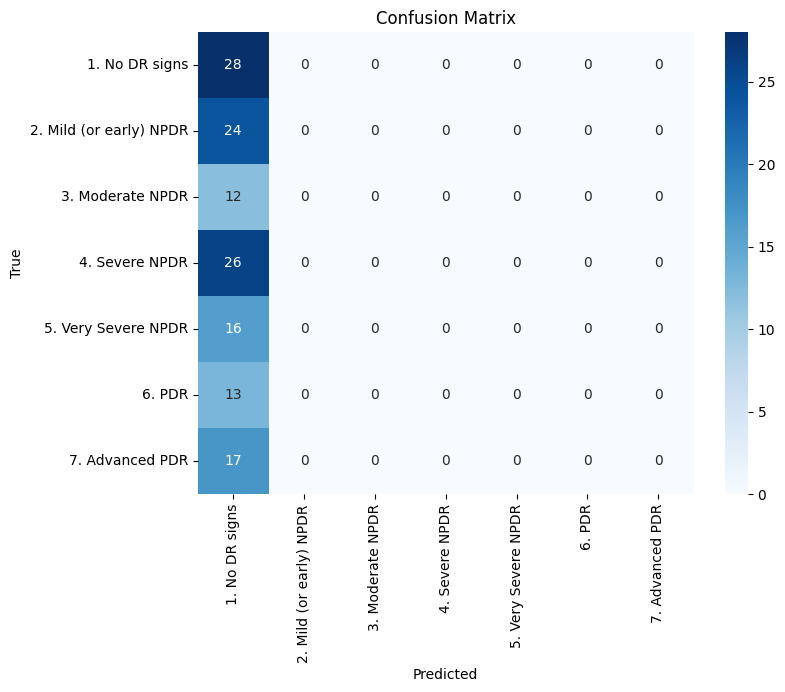

Training Time: 408.33 seconds
Accuracy: 0.2059
Precision: nan
Recall (Sensitivity): 0.1429
F1-Score: nan
Specificity: -inf


<ipython-input-4-756f702e1344>:16: RuntimeWarning: invalid value encountered in divide
  precision = TP / (TP + FP)
<ipython-input-4-756f702e1344>:19: RuntimeWarning: divide by zero encountered in divide
  specificity = TN / (TN + FP)


In [4]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute Metrics
TN = np.diag(cm).sum() - cm.sum(axis=0)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)
accuracy = np.trace(cm) / np.sum(cm)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {np.mean(precision):.4f}")
print(f"Recall (Sensitivity): {np.mean(recall):.4f}")
print(f"F1-Score: {np.mean(f1_score):.4f}")
print(f"Specificity: {np.mean(specificity):.4f}")